# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.


## Scoping


### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.

## Import Python Modules

First, import the primary modules that will be used in this project:

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading the Data

To analyze the status of conservation of species and their observations in national parks, load the datasets into `DataFrames`. Once loaded as `DataFrames` the data can be explored and visualized with Python.

In the next steps, `Observations.csv`  and `Species_info.csv` are read in as `DataFrames` called `observations` and `species` respectively. The newly created `DataFrames` are glimpsed with `.head()` to check its contents.

#### species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

In [2]:
species = pd.read_csv('Species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### observations

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [3]:
observations = pd.read_csv('Observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Data Characteristics

Next, there will be a check for the dimensions of the data sets, for `species` there are 5,824 rows and 4 columns while `observations` has 23,296 rows and 3 columns.

In [4]:
print(species.dtypes)
species.info()

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [5]:
print(observations.dtypes)
observations.info()

scientific_name    object
park_name          object
observations        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


## Explore the Data

### Data cleaning

#### species

It is time to explore the `species` data a little more in depth. I print out all the unique value of each column

In [6]:
for i in range(0,len(species.columns)):
    print(f"Unique value of {species.columns[i]}: {species[species.columns[i]].unique()} \n")

Unique value of category: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant'] 

Unique value of scientific_name: ['Clethrionomys gapperi gapperi' 'Bos bison' 'Bos taurus' ...
 'Parthenocissus vitacea' 'Vitis californica' 'Tribulus terrestris'] 

Unique value of common_names: ["Gapper's Red-Backed Vole" 'American Bison, Bison'
 'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle' ...
 'Thicket Creeper, Virginia Creeper, Woodbine'
 'California Grape, California Wild Grape'
 'Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur'] 

Unique value of conservation_status: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery'] 



In [7]:
species.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [8]:
maxRows = species['category'].count()
print('% Missing Data:')
print((1 - species.count() / maxRows) * 100)

% Missing Data:
category                0.000000
scientific_name         0.000000
common_names            0.000000
conservation_status    96.720467
dtype: float64


You might notice the *consevation status* of `species` dataset contains a significant amount of missing data. Eventhough the amount of missing data in this column is quiet high, about 96%, most of the questions relevant to this column and mighht become invalid to analysis if we remove it completely.
After taking a look on its unique value, the missing data seem to point to species without any conservation status. In another word, those rows is valueless in conservation manner and removing them effect nothhing on our result.

In [9]:
species.conservation_status = species.conservation_status.fillna('No Intervince')

In [10]:
print(species.conservation_status.unique())
species.info()

['No Intervince' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB


#### observations

It is time to explore the observations data a little more in depth. The first thing is to find the number of distinct value of each column in the data.

In [11]:
for i in range(0,len(observations.columns)):
    print(f"Unique value of {observations.columns[i]}: {observations[observations.columns[i]].unique()} \n")

Unique value of scientific_name: ['Vicia benghalensis' 'Neovison vison' 'Prunus subcordata' ...
 'Ranunculus hebecarpus' 'Gulo gulo' 'Dichanthelium depauperatum'] 

Unique value of park_name: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park'] 

Unique value of observations: [ 68  77 138  84  85 112 228  39 168 250 103 114 101 279  72  65 143 165
 150  80  83 109 158 167 135 247  73 261 177 117  79  96 140 116 239 262
  71 176 148  76 235 283  25 246  64 281  88  67 254 152 147 213 265 107
 156  47 157  89 154 127 106  75  36 137 244  63 214  92 108  54 105 115
  98 223  82  90 218  58  59  48 208  95  70 100  49  56 134  91  86 136
 257 123 263 118 258 252  27  74  94 132  57 282 110 253 267 230 124 131
 164 260 119 233 245  60 151  66 206 189 242 111 120 243 276 237  29 220
 266 166  53 240  55 215 125  99 199 128 232 251 269 163  93 241 122  69
  97 149 141 142 216 113 145  43 229 234 153 212 172 146 291 160 188 256
 12

In [12]:
observations.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


The `observations` dataset seem to be tidy and ready enough for analysing step.

## Analysis

### Question1: What is the distribution of conservation_status for animals?

The records in the `observations` dataset just include *scientific_name*, that indicate exactly what is the object of a certain observation, and *park_name* show the geographical information where the observation had been conducted. We need to connect the *scientific_name* to the corresponding *conservation_status* and then explore the distribution of conservation_status for animals 

In [13]:
df1 = pd.merge(observations,species)
df1 = df1[df1.conservation_status != 'No Intervince'].reset_index()
print(df1.info())
print('\n')
df1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                880 non-null    int64 
 1   scientific_name      880 non-null    object
 2   park_name            880 non-null    object
 3   observations         880 non-null    int64 
 4   category             880 non-null    object
 5   common_names         880 non-null    object
 6   conservation_status  880 non-null    object
dtypes: int64(2), object(5)
memory usage: 48.2+ KB
None




,index,scientific_name,park_name,observations,category,common_names,conservation_status
0,120,Zizia trifoliata,Yosemite National Park,135,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
1,121,Zizia trifoliata,Yellowstone National Park,238,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
2,122,Zizia trifoliata,Bryce National Park,87,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
3,123,Zizia trifoliata,Great Smoky Mountains National Park,80,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
4,204,Camissonia sierrae ssp. alticola,Bryce National Park,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern


First, summary statistics might be a good starting point to imagine how the conservated animals is allocated among national parks

In [14]:
tab_of_freq = pd.crosstab(df1.category, df1.conservation_status, values=df1.observations,aggfunc='sum') 
tab_of_freq = tab_of_freq.fillna(0)

tab_of_prop = (tab_of_freq / df1.observations.sum())
print(tab_of_freq)
print("\n")
(tab_of_prop*100).round(1)

conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Amphibian                 144.0          0.0              2044.0       564.0
Bird                      574.0       1392.0             40758.0         0.0
Fish                      455.0          0.0              2109.0      1645.0
Mammal                   2178.0        715.0             21675.0       578.0
Nonvascular Plant           0.0          0.0              2705.0         0.0
Reptile                     0.0          0.0              2536.0         0.0
Vascular Plant            162.0          0.0             22135.0       552.0




conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,0.1,0.0,2.0,0.5
Bird,0.6,1.4,39.6,0.0
Fish,0.4,0.0,2.0,1.6
Mammal,2.1,0.7,21.1,0.6
Nonvascular Plant,0.0,0.0,2.6,0.0
Reptile,0.0,0.0,2.5,0.0
Vascular Plant,0.2,0.0,21.5,0.5


Calculate all the **Marginal Proportions** from the contingency table of proportions. It is the proportion of each conservation status allocated in each park

In [75]:
species_marginals = (tab_of_prop.sum(axis=0)*100).round(1)
conservation_marginals = (tab_of_prop.sum(axis=1)*100).round(1)

In [76]:
species_marginals

conservation_status
Endangered             3.4
In Recovery            2.0
Species of Concern    91.3
Threatened             3.2
dtype: float64

In [77]:
conservation_marginals

category
Amphibian             2.7
Bird                 41.5
Fish                  4.1
Mammal               24.4
Nonvascular Plant     2.6
Reptile               2.5
Vascular Plant       22.2
dtype: float64

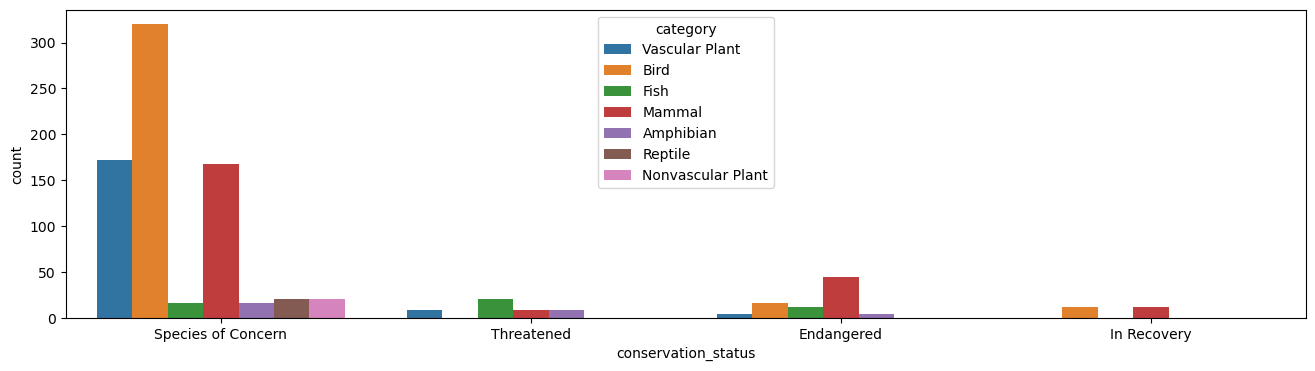

In [17]:
plt.figure(figsize=(16,4))
sns.countplot(x='conservation_status', hue='category', data=df1)
plt.show()

### Question2: Are certain types of species more likely to be endangered?

A specy is defined as endangered when its conservation status is any but not 'No Intevention'. Those under-risk species should be assembly in **Protected group** with 'True' value while the animals in the opposite status might be set as 'False'

In [37]:
df2 = pd.merge(observations,species)
df2['protected'] = df2.apply(lambda x: '' if (x.conservation_status != 'No Intervince') else False, axis=1)

In [44]:
tab_of_freq_protected = pd.crosstab(df2.category, df2.protected, values=df2.observations,aggfunc='sum') 
# tab_of_freq_protected = tab_of_freq_protected.fillna(0)

tab_of_prop_protected = (tab_of_freq_protected / df2.observations.sum())
# print(tab_of_freq_protected)
# print("\n")
tab_of_freq_protected

protected,False,True
category,,
Amphibian,42316,2752
Bird,289647,42724
Fish,68692,4209
Mammal,137974,25146
Nonvascular Plant,187948,2705
Reptile,43286,2536
Vascular Plant,2772463,22849


Obviously, those cumbersome numbers of each species are not alway a useful statistic, therefore it is important to calculate the rate of protection that each species exhibites in the data.

In [68]:
tab_of_freq_protected['protected_percent'] = (tab_of_freq_protected.apply(lambda x:x[1]/(x[0]+x[1]),axis=1)*100).round(1)

In [69]:
tab_of_freq_protected

protected,False,True,protected_percent
category,,,
Amphibian,42316,2752,6.1
Bird,289647,42724,12.9
Fish,68692,4209,5.8
Mammal,137974,25146,15.4
Nonvascular Plant,187948,2705,1.4
Reptile,43286,2536,5.5
Vascular Plant,2772463,22849,0.8


According to this table, **mammal** stand out as the most likely endangered species among those categories with **bird** represent the second position. 
One more step into exploring what type of mammal encounter the highest endangerment seem to be next step I would do 

### Question3: Are the differences between species and their conservation status significant?

This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The first test will be called `contingency1` and will need to be filled with the correct numbers for mammals and birds.

The results from the chi-squared test returns many values, the second value which is 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent. 

In [174]:
contingency1 = tab_of_freq_protected[(tab_of_freq_protected.index == 'Mammal')|(tab_of_freq_protected.index == 'Bird')]
contingency1 = contingency1[[0,1]]
contingency1

protected,False,True
category,,
Bird,289647,42724
Mammal,137974,25146


In [88]:
chi2_contingency(contingency1)

(607.025403771619,
 4.96286529605068e-134,
 1,
 array([[286844.40159559,  45526.59840441],
        [140776.59840441,  22343.40159559]]))

### Question4: Which animal is most prevalent and what is their distribution amongst parks?

The next set of analysis will come from data from the conservationists as they have been recording sightings of different species at several national parks for the past 7 days.
The first step is to look at the the common names from species to get an idea of the most prevalent animals in the dataset. The data will be need to be split up into individual names.

In [91]:
import string

In [92]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [93]:
def remove_punctuation(text):
    for punc in string.punctuation:
        text = text.replace(punc,'')
    return text

In [100]:
common_Names = species[species.category=='Mammal']\
                .common_names\
                .apply(remove_punctuation)\
                .str.split()
common_Names

0                              [Gappers, RedBacked, Vole]
1                                [American, Bison, Bison]
2       [Aurochs, Aurochs, Domestic, Cattle, Feral, Do...
3       [Domestic, Sheep, Mouflon, Red, Sheep, Sheep, ...
4                                       [Wapiti, Or, Elk]
                              ...                        
4499                                [Mount, Lyell, Shrew]
4500                                     [Montane, Shrew]
4501                                        [Inyo, Shrew]
4502                                 [Trowbridges, Shrew]
4503                                  [BroadFooted, Mole]
Name: common_names, Length: 214, dtype: object

The next step is to clean up duplicate words in each row since they should no be counted more than once per species.

In [114]:
def remove_duplicate(string_array):
    return list(dict.fromkeys(string_array))

common_Names = common_Names.apply(remove_duplicate)
common_Names

0                             [Gappers, RedBacked, Vole]
1                                      [American, Bison]
2       [Aurochs, Domestic, Cattle, Feral, Domesticated]
3                 [Domestic, Sheep, Mouflon, Red, Feral]
4                                      [Wapiti, Or, Elk]
                              ...                       
4499                               [Mount, Lyell, Shrew]
4500                                    [Montane, Shrew]
4501                                       [Inyo, Shrew]
4502                                [Trowbridges, Shrew]
4503                                 [BroadFooted, Mole]
Name: common_names, Length: 214, dtype: object

In [156]:
words_counted = []
for i in common_Names:
    words_counted += i

df_words = pd.DataFrame(words_counted)
df_words.columns = ['word']
df_words = df_words.groupby('word').word.count()
df_words_counted = pd.DataFrame(df_words)
df_words_counted.columns = ['count']
df_words_counted.sort_values(by='count',ascending=False).head()

,count
word,
Bat,23
Shrew,18
Myotis,17
Mouse,16
Chipmunk,13


In the data, there are several different scientific names for different types of **bats**. The next task is to figure out which rows of species are referring to bats. A new column made up of boolean values will be created to check if `is_bat` is True.

In [161]:
species['is_bat'] = species.common_names.str.contains(' Bat',regex=True)
species[species.is_bat == True]

,category,scientific_name,common_names,conservation_status,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervince,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervince,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervince,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervince,True


Next the results of the bat species will be merged with observations to create a DataFrame with observations of bats across the four national parks.

In [178]:
bat_observations = pd.merge(observations,species[species.is_bat==True])
bat_observations.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervince,True


Let's see how many total bat observations(across all species) were made at each national park.

The total number of bats observed in each park over the past 7 days are in the table below. Yellowstone National Park seems to have the largest with 8,362 observations and the Great Smoky Mountains National Park having the lowest with 2,411.

In [179]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786
